# **DL4- Dog vs cat classification using transfer learning**

### **Transfer_Learning**

**Transfer Learning is a Deep Learning technique where we use a pre-trained model. This Pre-trained model is trained for one task and can be re-trained for a similar task with a smaller dataset**
#### **Transfer Learning gives higher accuracy compared to training models from scratch**

### **Examples of Pre-trained Models:**

* VGG-16
* ResNet50
* inceptionv3
* MobileNet v2



#### WorkFlow

* Dataset ---> image Processing ---> Train Test Split ==> pretrained Mobilenet model ==> new image ==> Mobilenet model trained on dog vs cat data ==>dog vs cat

In [67]:
from zipfile import ZipFile
 
dataset = "C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/test1.zip"

with ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning")
    print("train.zip Extraction Completed")


train.zip Extraction Completed


In [68]:
import os
# counting the number of files in the train folder
path, dirs, files = next(os.walk("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train"))
files_count = len(files)
print("Number of files in train folder:", files_count)

Number of files in train folder: 25000


### Printing the  name of images

In [69]:
file_names = os.listdir("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train")
print(file_names)  # Print first 10 file names

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

## **Importing the Dependencies**

In [70]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
from cv2 import imread, resize,imshow,imwrite,cvtColor, COLOR_BGR2RGB
import os

## Displaying the Images of dogs and cats

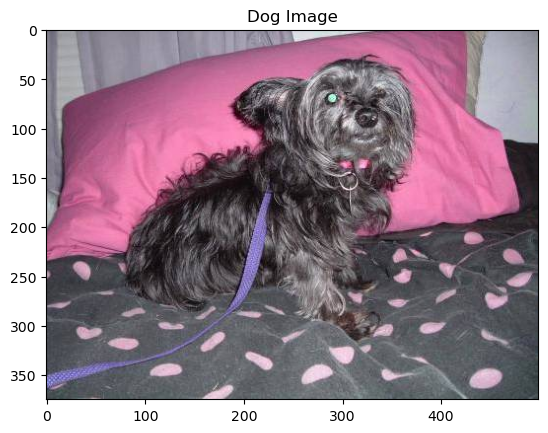

In [71]:
# display dog image
img = mpimg.imread("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train/dog.0.jpg")
plt.imshow(img)
plt.title("Dog Image")
plt.show()

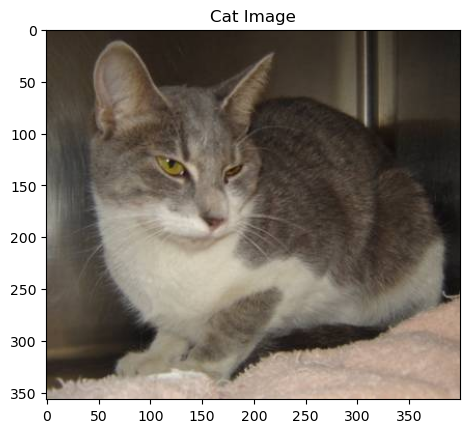

In [72]:
# display the image of cat
img = mpimg.imread("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train/cat.4352.jpg")
plt.imshow(img)
plt.title("Cat Image")
plt.show()

In [73]:
# print 'cat' or 'dog' from first 10 file names
file_name = os.listdir("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train")
for i in range(10):
    name = file_name[i]
    print(name[0:3]) # Print 'cat' or 'dog'

cat
cat
cat
cat
cat
cat
cat
cat
cat
cat


In [74]:
# count number of dog and cat images
file_names = os.listdir("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train")

dog_count = 0
cat_count = 0

for name in file_names:
    name = name[0:3]
    if name == 'dog':
        dog_count += 1
    else:
        cat_count += 1
print("Number of dog images:", dog_count)
print("Number of cat images:", cat_count)

Number of dog images: 12500
Number of cat images: 12500


## Resizing all the image

In [75]:
import os
import random
import shutil
from PIL import Image

original_dir = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/train"
resized_dir  = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/resized_images"

# ======== CLEAN THE RESIZED FOLDER BEFORE INSERTING NEW IMAGES ========
if os.path.exists(resized_dir):
    shutil.rmtree(resized_dir)        # Delete entire folder
os.makedirs(resized_dir, exist_ok=True)  # Recreate clean folder
# =======================================================================

# Get cat and dog file names
cat_files = [f for f in os.listdir(original_dir) if f.startswith("cat")]
dog_files = [f for f in os.listdir(original_dir) if f.startswith("dog")]

print("Total cats in train folder :", len(cat_files))
print("Total dogs in train folder :", len(dog_files))

# Shuffle to pick random 1000 each
random.shuffle(cat_files)
random.shuffle(dog_files)

cat_files = cat_files[:1000]
dog_files = dog_files[:1000]

# Combine and shuffle for random order
combined_files = cat_files + dog_files
random.shuffle(combined_files)

# Resize and save with low file size
for file_name in combined_files:
    img_path = os.path.join(original_dir, file_name)
    
    img = Image.open(img_path)
    img = img.resize((224, 224)).convert("RGB")

    save_path = os.path.join(resized_dir, file_name)

    # Save JPEG with smaller file size
    img.save(save_path, format="JPEG", quality=70, optimize=True)

# Count final images
resized_files = os.listdir(resized_dir)

dog_count = sum(1 for f in resized_files if f.startswith("dog"))
cat_count = sum(1 for f in resized_files if f.startswith("cat"))

print("\n===== Final Count in Resized Folder =====")
print("Total resized images:", len(resized_files))
print("Number of dog images:", dog_count)
print("Number of cat images:", cat_count)


Total cats in train folder : 12500
Total dogs in train folder : 12500

===== Final Count in Resized Folder =====
Total resized images: 2000
Number of dog images: 1000
Number of cat images: 1000


In [76]:
#print the total number of dog and cat images in the resized_images folder
resized_dir = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/resized_images/"
file_names = os.listdir(resized_dir)
dog_count = 0
cat_count = 0
for name in file_names:
    name = name[0:3]
    if name == 'dog':
        dog_count += 1
    else:
        cat_count += 1
print("Number of dog images in resized_images folder:", dog_count)
print("Number of cat images in resized_images folder:", cat_count)


Number of dog images in resized_images folder: 1000
Number of cat images in resized_images folder: 1000


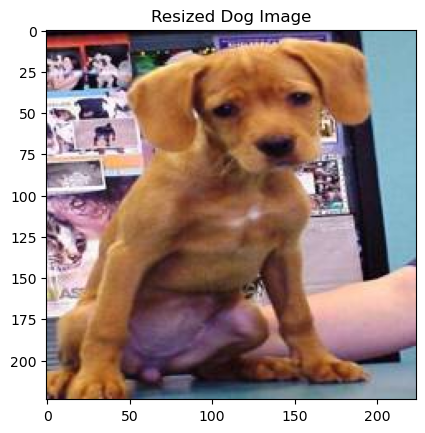

In [77]:
# display resized dog image
img = mpimg.imread("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/resized_images/dog.1234.jpg")
plt.imshow(img)
plt.title("Resized Dog Image")
plt.show()

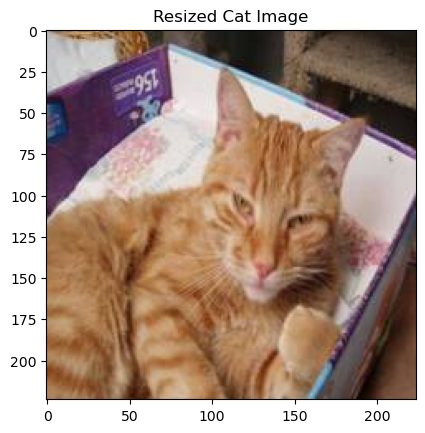

In [81]:
# display cat image
img = mpimg.imread("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/resized_images/cat.1236.jpg")
plt.imshow(img)
plt.title("Resized Cat Image")
plt.show()

# Creating labels for resized images of  dogs and cats

**Cat ==> 0**
**Dog ==> 1**

In [82]:
# creating a for loop to assign labels
file_names = os.listdir("C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/resized_images/") 
labels = []
for i in range(2000):
    file_name = file_names[i]
    label = file_name[0:3]

    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [83]:
print(file_names[:10])  # Print first 10 file names
print(len(file_names))  # Print total number of files

['cat.10003.jpg', 'cat.10009.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10047.jpg', 'cat.10071.jpg', 'cat.10074.jpg', 'cat.10076.jpg', 'cat.10090.jpg', 'cat.10096.jpg']
2000


In [84]:
# print first 10 labels
print(labels[:10])
print(len(labels))  # Print total number of labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2000


In [85]:
# counting the images of dogs and cats outoff 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


# **Converting all the resized images into numpy arrays**

In [86]:
import cv2
import glob


In [88]:
# we use glob to read all images with different extensions
image_directory = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/resized_images/"
image_extension = ['jpg', 'jpeg', 'png']

files = []

[files.extend(glob.glob(image_directory + '*.' + e )) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [89]:
print(dog_cat_images)

[[[[215 237 235]
   [219 241 239]
   [222 245 247]
   ...
   [ 38  35  44]
   [ 37  35  41]
   [ 39  37  43]]

  [[216 238 236]
   [220 242 240]
   [222 245 247]
   ...
   [ 35  31  37]
   [ 35  31  37]
   [ 40  36  41]]

  [[217 239 237]
   [221 243 241]
   [225 246 248]
   ...
   [ 46  41  43]
   [ 53  46  49]
   [ 60  53  56]]

  ...

  [[139 154 180]
   [134 151 177]
   [137 152 178]
   ...
   [ 56  63  80]
   [ 56  62  81]
   [ 56  62  81]]

  [[133 150 177]
   [126 145 172]
   [127 144 171]
   ...
   [ 68  77  97]
   [ 84  92 115]
   [ 93 104 126]]

  [[144 163 190]
   [138 157 184]
   [136 155 182]
   ...
   [ 73  84 106]
   [ 68  80 104]
   [ 65  77 101]]]


 [[[157 203 214]
   [157 203 214]
   [157 203 214]
   ...
   [138 197 207]
   [138 197 207]
   [138 197 207]]

  [[156 202 213]
   [157 203 214]
   [157 203 214]
   ...
   [138 197 207]
   [138 197 207]
   [138 197 207]]

  [[156 202 213]
   [156 202 213]
   [156 202 213]
   ...
   [139 198 208]
   [139 198 208]
   [139 198

In [90]:
type(dog_cat_images)

numpy.ndarray

In [91]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [94]:
X = dog_cat_images
Y = np.asarray(labels)

# Train Test Split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Split the dataset into training and testing sets


In [98]:
# print the shape of x_train and x_test
print(f"training images :{x_train.shape}")
print(f"testing images :{x_test.shape}")

training images :(1600, 224, 224, 3)
testing images :(400, 224, 224, 3)


# **1600 ==> training images**
# **400 ==> testing images**

In [149]:
# sclaling the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [150]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[[[1.38192804e-10 7.60524074e-11 3.06064583e-11]
   [1.43757603e-10 8.25446864e-11 3.80262037e-11]
   [1.37265324e-10 7.69798808e-11 3.52438009e-11]
   ...
   [1.74364037e-10 1.03876456e-10 5.84305035e-11]
   [1.72509104e-10 1.06658862e-10 6.02854502e-11]
   [1.62306960e-10 9.83116435e-11 5.19382280e-11]]

  [[1.34482925e-10 7.23425347e-11 2.68965822e-11]
   [1.37265324e-10 7.60524074e-11 3.15339248e-11]
   [1.32627978e-10 7.23425347e-11 3.06064583e-11]
   ...
   [1.68799238e-10 9.83116435e-11 5.28656945e-11]
   [1.66016839e-10 1.00166590e-10 5.37931644e-11]
   [1.66016839e-10 1.02021523e-10 5.56481007e-11]]

  [[1.36337858e-10 7.41974676e-11 2.87515203e-11]
   [1.35410391e-10 7.41974676e-11 2.96789919e-11]
   [1.32627978e-10 7.23425347e-11 3.06064583e-11]
   ...
   [1.61379493e-10 9.08919051e-11 4.54459526e-11]
   [1.58597094e-10 9.36743044e-11 4.45184827e-11]
   [1.66016839e-10 1.02948990e-10 5.37931644e-11]]

  ...

  [[1.55814694e-10 1.00166590e-10 5.19382280e-11]
   [1.58597094e-

# **Building the Neural Network**

In [151]:
import tensorflow as tf
import os

# Your directory
save_dir = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/mobilenet_feature_extractor"

os.makedirs(save_dir, exist_ok=True)

# Load pretrained MobileNetV2 without top layer
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet",
    pooling="avg"
)

# Freeze the base model
base_model.trainable = False

# Save as a TensorFlow SavedModel
tf.saved_model.save(base_model, save_dir)

print("Model saved at:", save_dir)


INFO:tensorflow:Assets written to: C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/mobilenet_feature_extractor\assets


INFO:tensorflow:Assets written to: C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/mobilenet_feature_extractor\assets


Model saved at: C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/mobilenet_feature_extractor


In [152]:
import tensorflow as tf
from keras.layers import TFSMLayer

# Load the SavedModel as a layer
feature_extractor = TFSMLayer(
    r"C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/mobilenet_feature_extractor",
    call_endpoint='serving_default'
)

print("Model loaded successfully using TFSMLayer!")

Model loaded successfully using TFSMLayer!


In [153]:
# Wrap in a Keras model
inputs = tf.keras.Input(shape=(224, 224, 3))
outputs = feature_extractor(inputs)
model = tf.keras.Model(inputs, outputs)

# Run a dummy forward pass to build the model
dummy_input = tf.random.uniform((1, 224, 224, 3))
_ = model(dummy_input)

In [154]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # corrected typo
    metrics=['accuracy']
)


In [161]:
dummy_input = tf.random.uniform((1, 224, 224, 3))
dummy_output = feature_extractor(dummy_input)

print(type(dummy_output))  # should show <class 'dict'>
print(dummy_output.keys()) # see what outputs are available


<class 'dict'>
dict_keys(['output_0'])


In [162]:
import tensorflow as tf
from keras import layers
from keras.layers import TFSMLayer

# Load the feature extractor
feature_extractor = TFSMLayer(
    r"C:/Users/pawar/Desktop/AiML Projects/DL/DL4-Dog_Cat_Classification-Transfer_Learning/mobilenet_feature_extractor",
    call_endpoint='serving_default'
)

# Freeze the feature extractor (transfer learning)
feature_extractor.trainable = False

# Wrap in a Keras model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = feature_extractor(inputs)['output_0']  # extract the tensor from dict
x = layers.Flatten()(x)                     # flatten to 2D
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(2)(x)               # 2 classes: dog vs cat

model = tf.keras.Model(inputs, outputs)

# Run a dummy pass to initialize variables
_ = model(tf.random.uniform((1, 224, 224, 3)))

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Check summary
model.summary()

# Now you can train
# history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tfsm_layer_5 (TFSMLayer)        │ (None, 1280)           │     2,257,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [163]:
import numpy as np

# x_train: shape (num_samples, 224, 224, 3), dtype float32
x_train = np.array(x_train, dtype=np.float32) / 255.0  # normalize pixel values

# y_train: integer labels (0 or 1 for dog/cat)
y_train = np.array(y_train, dtype=np.int32)


In [164]:
history = model.fit(
    x_train, 
    y_train,
    batch_size=32,       # adjust according to your memory
    epochs=5,            # can increase later
    validation_split=0.2 # optional: 20% data for validation
)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 733ms/step - accuracy: 0.5023 - loss: 0.8253 - val_accuracy: 0.5437 - val_loss: 0.6994
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 675ms/step - accuracy: 0.4930 - loss: 0.7246 - val_accuracy: 0.4563 - val_loss: 0.7231
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 715ms/step - accuracy: 0.5008 - loss: 0.8078 - val_accuracy: 0.4563 - val_loss: 0.7446
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 677ms/step - accuracy: 0.5086 - loss: 0.7249 - val_accuracy: 0.4563 - val_loss: 0.7295
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 655ms/step - accuracy: 0.5102 - loss: 0.7160 - val_accuracy: 0.5437 - val_loss: 0.7022


In [165]:
score, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print(f"Test Loss: {score}")
print(f"Test Accuracy: {accuracy}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 514ms/step - accuracy: 0.5025 - loss: 0.7228
Test Loss: 0.7227526903152466
Test Accuracy: 0.5024999976158142


# **Predective System**

In [168]:
input_image_path = input("Enter the path of the image: ")
input_image = cv2.imread(input_image_path)
input_image = cv2.resize(input_image, (224, 224))
input_image = input_image.astype('float32') / 255.0
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

predictions = model.predict(input_image)
predicted_class = np.argmax(predictions, axis=1)[0]

if predicted_class == 0:
    print("The image is of a Cat.")
else:
    print("The image is of a Dog.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
The image is of a Cat.
